In [6]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from docx import Document
nlp = spacy.load('en_core_web_sm')

In [7]:
bachelor_thesis = Document('./../Linss-Lukas-ba.docx')
paragraphs = bachelor_thesis.paragraphs
text = ''
for p in paragraphs:
    if len(p.text) > 100:
        text += p.text

In [8]:
print(len(text), text)

126076 With the use of virtual worlds becoming a growing trend, the metaverse is becoming a promising channel for Brands to offer their customers immersive shopping experiences. While virtual interactive worlds are nothing new and have been utilised for purposes such as video games for almost 50 years, an increasing number of brands and platforms are offering open-ended virtual experiences which are marketed under the term metaverse. The meteoric rise of this new virtual channel has prompted many researchers to study this emerging field to clear up the vagueness surrounding the topic. However, at present the academic literature is still struggling to define the boundaries of what is and what is not a metaverse. Meanwhile, other research focuses on the commercial applications of the metaverse, with the intent of translating existing consumer behaviour research on store atmospherics and layouts, from traditional channels to the domain of virtual commerce. While many brands are interested

In [9]:
doc = nlp(text)

In [10]:
stop_words = list(STOP_WORDS)

In [11]:
token_dictionary = {}

for token in doc:
    if token.lemma_.lower() not in stop_words and not token.is_punct:
        if token.lemma_.lower() not in token_dictionary.keys():
            token_dictionary[token.lemma_.lower()] = 1
        else:
            token_dictionary[token.lemma_.lower()] += 1

In [12]:
sorted_tokens =  {k: v for k, v in sorted(token_dictionary.items(), key=lambda item: item[1], reverse=True)}
sorted_tokens

{'virtual': 226,
 'metaverse': 193,
 'store': 168,
 'use': 151,
 'user': 143,
 'solution': 124,
 'platform': 102,
 'scene': 97,
 'space': 92,
 'experience': 89,
 'world': 85,
 'customer': 79,
 'offer': 77,
 'product': 76,
 'shopping': 66,
 'create': 63,
 'utilise': 61,
 'commerce': 61,
 'development': 60,
 'decentraland': 59,
 'technology': 54,
 'model': 52,
 'include': 50,
 'provide': 50,
 'mall': 47,
 '3d': 47,
 'requirement': 46,
 'company': 44,
 'design': 43,
 'channel': 42,
 'consumer': 42,
 'time': 42,
 'implement': 41,
 'aspect': 38,
 'new': 37,
 'building': 37,
 'term': 35,
 'require': 35,
 'module': 35,
 'follow': 34,
 'implementation': 34,
 'payment': 34,
 'display': 34,
 'launch': 33,
 'resource': 32,
 'section': 32,
 'content': 32,
 'define': 31,
 'datum': 31,
 'allow': 31,
 'add': 31,
 'entity': 31,
 'game': 30,
 'worldline': 30,
 'research': 29,
 'build': 29,
 'additionally': 29,
 'physical': 29,
 'feature': 29,
 'layout': 28,
 'business': 28,
 'influence': 28,
 ' ': 27,


In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

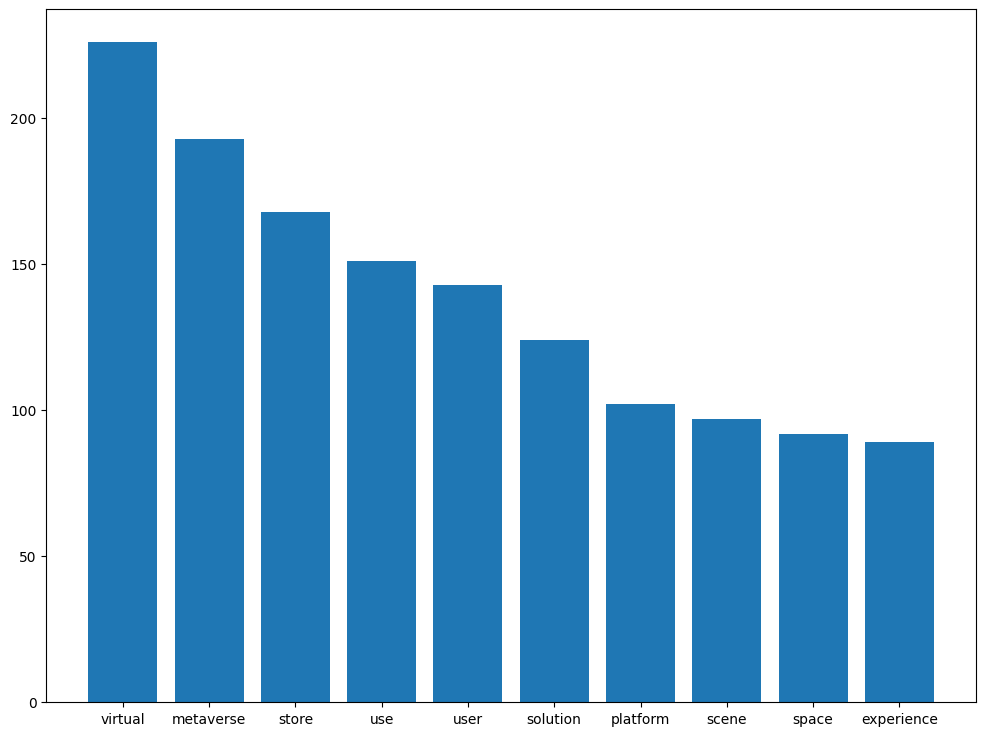

In [14]:

plt.figure(figsize=(12,9))
plt.bar(range(0,10), list(sorted_tokens.values())[0:10])
plt.xticks(range(0,10), list(sorted_tokens.keys())[0:10])
plt.show()

In [15]:
lemma_text = ''

for token in doc:
    if not token.is_punct:
        lemma_text += token.lemma_
        lemma_text += ' '

In [16]:
lemma_text

"with the use of virtual world become a grow trend the metaverse be become a promising channel for Brands to offer their customer immersive shopping experience while virtual interactive world be nothing new and have be utilise for purpose such as video game for almost 50 year an increase number of brand and platform be offer open end virtual experience which be market under the term metaverse the meteoric rise of this new virtual channel have prompt many researcher to study this emerge field to clear up the vagueness surround the topic however at present the academic literature be still struggle to define the boundary of what be and what be not a metaverse meanwhile other research focus on the commercial application of the metaverse with the intent of translate exist consumer behaviour research on store atmospheric and layout from traditional channel to the domain of virtual commerce while many brand be interested in utilise this new channel create they come with several challenge and 

In [32]:
wc = WordCloud(background_color='white',
               height=720,
               width=720,
               stopwords=STOP_WORDS,
               max_words=100
               )

In [33]:
wc.generate(lemma_text)
wc.to_file('word_cloud.png')